# Exploratory data analysis
Este es un proyecto de Regresión Logística, se trata de entrenar un modelo de clasificación en un caso multinomial.

## Datos de entrada
Nos proporcionan dos Datasets:
1. dataset_train.csv (dataset de entrenamiento con  1600 registros)
2. dataset_test.csv (dataset de test con 400 registros)

Los campos (columnas o características) son iguales en ambos archivos salvo la columna target 'Hogwarts House' que en el archivo 'test' está vacía y en el archivo 'train' contiene las cuatro clases con las que debebos realizar la clasificación:
- Gryffindor
- Hufflepuff
- Ravenclaw
- Slytherin

In [1]:
import pandas as pd

# Establecemos la ruta y leemos el archivo convirtiéndolo en un DataFrame
file_train = '../datasets/dataset_train.csv'
df_train = pd.read_csv(file_train, index_col=0)

# Análogamente para los datos de test
file_test = '../datasets/dataset_test.csv'
df_test = pd.read_csv(file_test, index_col=0)

# Muestra las primeras filas del dataframe train
df_train.head(8)

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.0,628.046051,-4.861976,-6.280461,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.0,411.412727,5.931832,-4.114127,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-0.171704,-244.03492,72.25


In [2]:
# Muestra información sobre la estructura de datos del DataFrame train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hogwarts House                 1600 non-null   object 
 1   First Name                     1600 non-null   object 
 2   Last Name                      1600 non-null   object 
 3   Birthday                       1600 non-null   object 
 4   Best Hand                      1600 non-null   object 
 5   Arithmancy                     1566 non-null   float64
 6   Astronomy                      1568 non-null   float64
 7   Herbology                      1567 non-null   float64
 8   Defense Against the Dark Arts  1569 non-null   float64
 9   Divination                     1561 non-null   float64
 10  Muggle Studies                 1565 non-null   float64
 11  Ancient Runes                  1565 non-null   float64
 12  History of Magic               1557 non-null   float6

In [3]:
# Muestra información sobre la estructura de datos del DataFrame test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hogwarts House                 0 non-null      float64
 1   First Name                     400 non-null    object 
 2   Last Name                      400 non-null    object 
 3   Birthday                       400 non-null    object 
 4   Best Hand                      400 non-null    object 
 5   Arithmancy                     387 non-null    float64
 6   Astronomy                      387 non-null    float64
 7   Herbology                      389 non-null    float64
 8   Defense Against the Dark Arts  392 non-null    float64
 9   Divination                     394 non-null    float64
 10  Muggle Studies                 390 non-null    float64
 11  Ancient Runes                  392 non-null    float64
 12  History of Magic               389 non-null    float64


## Explorando los datos de entrenamiento

In [4]:
# Show the Null values by column
print("\tNull values by column:")
print(df_train.isnull().sum())

	Null values by column:
Hogwarts House                    0
First Name                        0
Last Name                         0
Birthday                          0
Best Hand                         0
Arithmancy                       34
Astronomy                        32
Herbology                        33
Defense Against the Dark Arts    31
Divination                       39
Muggle Studies                   35
Ancient Runes                    35
History of Magic                 43
Transfiguration                  34
Potions                          30
Care of Magical Creatures        40
Charms                            0
Flying                            0
dtype: int64


In [5]:
# Show the unique values by nominal features ('Hogwarts House' and 'Best Hand')
print("Unique values by categoric feature\n")

# Analysis of unique values for 'Hogwarts House'
print("Unique values in Hogwarts House:")
print(df_train['Hogwarts House'].value_counts())

# Analysis of unique values for 'Best Hand'
print("\nUnique values in Best Hand:")
print(df_train['Best Hand'].value_counts())

Unique values by categoric feature

Unique values in Hogwarts House:
Hogwarts House
Hufflepuff    529
Ravenclaw     443
Gryffindor    327
Slytherin     301
Name: count, dtype: int64

Unique values in Best Hand:
Best Hand
Right    810
Left     790
Name: count, dtype: int64


## Análisis de Correlaciones
Realizamos un análisis de correlaciones entre las variables numéricas del dataset, generando una visualización mediante un mapa de calor y detectando correlaciones altas que podrían indicar redundancia en los datos.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

# Seleccionar solo columnas numéricas
numeric_columns = df_train.select_dtypes(include=['float64']).columns

### Análisis de Correlaciones
Calculamos la matriz de correlaciones y visualizamos los resultados.

In [7]:
# Establecemos un límite arbitrario para estudiar las altas correlaciones
CORRELATION_THRESHOLD = 0.6

# Calcular matriz de correlación
correlation_matrix = df_train[numeric_columns].corr()

# Encontrar correlaciones altas
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > CORRELATION_THRESHOLD:
            high_correlations.append({
                'variable1': correlation_matrix.index[i],
                'variable2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

# Ordenar por valor absoluto de correlación
high_correlations = sorted(high_correlations,
                            key=lambda x: abs(x['correlation']),
                            reverse=True)

# Imprimir las correlaciones en formato de lista numerada
print("Correlaciones más altas encontradas:")
for idx, corr in enumerate(high_correlations, start=1):
    print(f"\t{idx}. {corr['variable1']} - {corr['variable2']}: {corr['correlation']:.3}")

Correlaciones más altas encontradas:
	1. Defense Against the Dark Arts - Astronomy: -1.0
	2. Flying - History of Magic: -0.896
	3. Flying - Transfiguration: -0.874
	4. Transfiguration - History of Magic: 0.849
	5. Charms - Muggle Studies: 0.848
	6. Charms - Herbology: 0.747
	7. Potions - History of Magic: 0.602


### Visualización
Create and save heatmap.

Creamos un mapa de calor para visualizar las correlaciones.

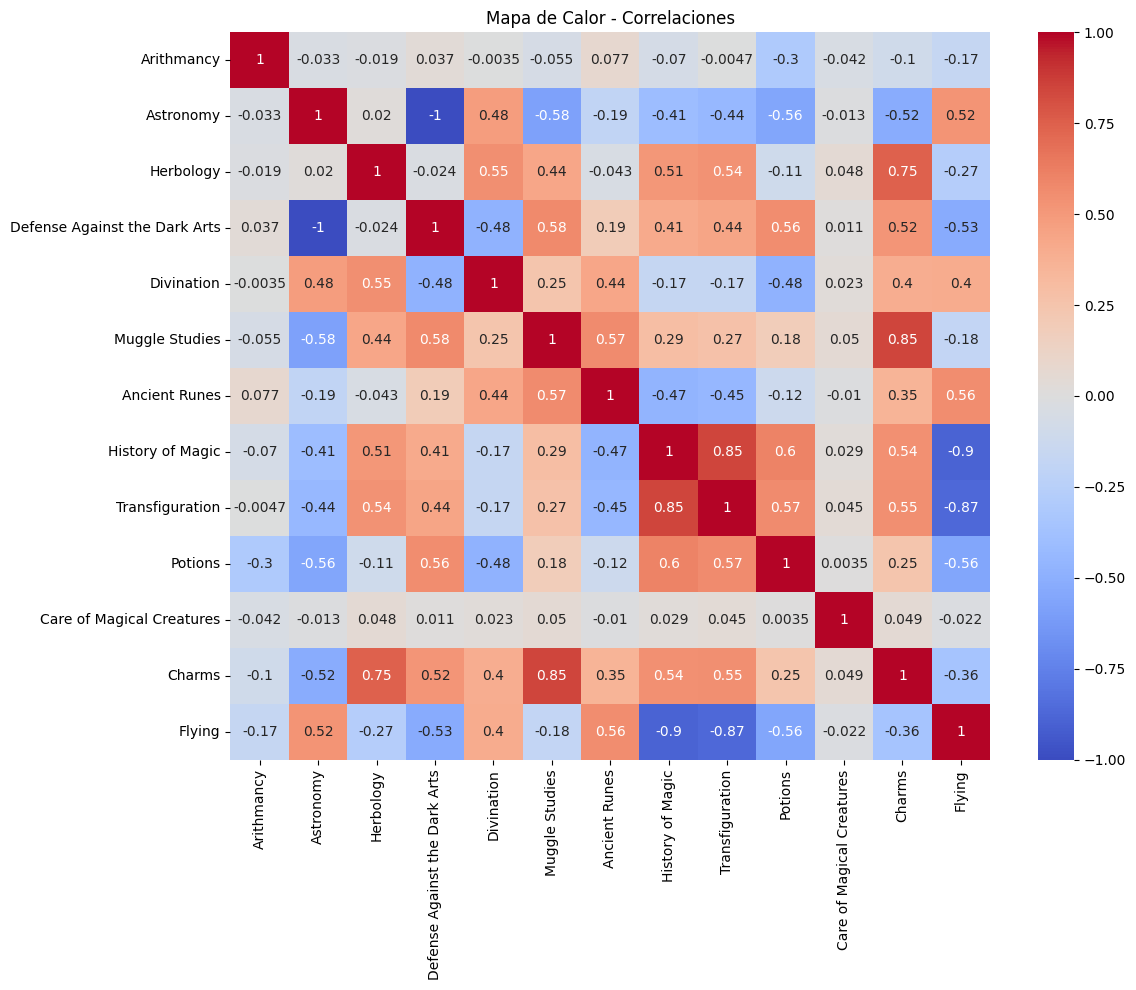

In [8]:
output_image_file = '../output/correlation_heatmap.png'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)
plt.title('Mapa de Calor - Correlaciones')
plt.tight_layout()
plt.savefig(output_image_file)  # crea el archivo de imagen
plt.show()

### Análisis de Correlaciones Perfectas
- Cuando dos variables están perfectamente correlacionadas (|r| = 1), contienen la misma información, por lo que una es redundante y puede eliminarse sin perder información útil.
- Esto ayuda a reducir la dimensionalidad y mejorar la eficiencia del modelo.
- En lugar de eliminar una columna arbitrariamente, elegiremos aquella cuya eliminación preserve más datos al eliminar las filas con datos faltantes (NaN).
- Se analiza cuántas filas tienen valores nulos en cada una de las dos variables perfectamente correlacionadas.
- Se elige eliminar la variable cuya eliminación provoque menos pérdida de datos en el DataFrame.
- Es importante eliminar una de ellas para evitar el problema de multicolinealidad.

In [9]:
def analyze_perfect_correlations(df, high_correlations):
    """
    Analiza correlaciones perfectas y sugiere qué variable eliminar

    Args:
    df (pd.DataFrame): Dataset completo
    high_correlations (list): Lista de correlaciones altas

    Returns:
    str: Nombre de la columna a eliminar, si existe correlación perfecta
    """
    if not high_correlations or abs(high_correlations[0]['correlation']) < 0.999999:
        return None

    feature1 = high_correlations[0]['variable1']
    feature2 = high_correlations[0]['variable2']

    # Obtener todas las columnas excepto las perfectamente correlacionadas
    rest_columns = [col for col in df.columns if col not in [feature1, feature2]]

    # Crea una máscara que es True cuando:
        # - La fila tiene un NA en feature1 (df[feature1].isna())
        # - Y todas las demás columnas tienen datos (!NA) en esa fila (df[rest_columns].notna().all(axis=1))
    mask_feature1 = df[feature1].isna() & df[rest_columns].notna().all(axis=1)
        # Lo mismo para feature2
    mask_feature2 = df[feature2].isna() & df[rest_columns].notna().all(axis=1)

    # Cuenta cuántas filas cumplen cada condición
    data1 = mask_feature1.sum()  # Número de filas que perderemos si mantenemos feature1
    data2 = mask_feature2.sum()  # Número de filas que perderemos si mantenemos feature2

    print(f"Perderemos {data1} filas si mantenemos {feature1}")
    print(f"Perderemos {data2} filas si mantenemos {feature2}")

    # Column to drop
    column_to_drop = feature1 if data1 > data2 else feature2

    # Devuelve la feature que al eliminarla nos deja más filas completas
    return column_to_drop


# Analizar correlaciones perfectas
column_to_drop = analyze_perfect_correlations(df_train, high_correlations)
if column_to_drop:
    print(f"\nSe sugiere eliminar la columna: {column_to_drop}")

Perderemos 24 filas si mantenemos Defense Against the Dark Arts
Perderemos 26 filas si mantenemos Astronomy

Se sugiere eliminar la columna: Astronomy


### Grabar en un archivo JSON la columna a eliminar
Se graba en un archivo la columna se que propone eliminar para usar esta información en un Notebook posterior.

In [10]:
# Save the column to drop in the output directory
config_file = '../output/colum_to_drop.json'
config = {'column_to_drop': column_to_drop}
with open(config_file, 'w') as f:
    json.dump(config, f)

print(f"\nLa columna que se sugiere eliminar ha sido grabada en:\n\t{config_file}")


La columna que se sugiere eliminar ha sido grabada en:
	../output/colum_to_drop.json
